In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D, Conv2D
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential

## NOTE:
Please note that in the original paper "Gradient-Based Learning Applied to Document Recognition"
by Yann LeCun et al, the original image size was of 32x32 pixels.
However, in the TensorFlow MNIST dataset, the images are of 28x28 pixels.

Also, in the original paper, hyperbolic tangent (tanh) activation functions were used in the hidden
layers, however, in the code below, ReLU activation functions are used in the hidden layers.

## Data preprocessing:

In [2]:
# Load and prepare the MNIST dataset-
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Normalize and convert samples from integers to floating-point numbers-
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [4]:
# Perform one-hot encoding for targets-
n_classes = 10

y_train_ohe = tf.keras.utils.to_categorical(y_train, n_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test, n_classes)

In [5]:
X_train = tf.reshape(X_train, shape=(X_train.shape[0], 28, 28, 1))
X_test = tf.reshape(X_test, shape = (X_test.shape[0], 28, 28, 1))

In [7]:
print("\nX_train.shape = {0} & y_train_ohe.shape = {1}".format(X_train.shape, y_train_ohe.shape))
print("X_test.shape = {0} & y_test_ohe.shape = {1}\n".format(X_test.shape, y_test_ohe.shape))


X_train.shape = (60000, 28, 28, 1) & y_train_ohe.shape = (60000, 10)
X_test.shape = (10000, 28, 28, 1) & y_test_ohe.shape = (10000, 10)



## Training LeNet-5 CNN for MNIST classification:

In [8]:
# Define the LeNet-5 CNN model for MNIST classification:

model = Sequential()

# Convolutional layer-1
model.add(Conv2D(filters = 6, kernel_size = (5, 5),
    strides = (1, 1), activation = 'relu', input_shape = (28, 28, 1)))

# Average pooling layer-1
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))

# Convolutional layer-2
model.add(Conv2D(filters = 16, kernel_size = (5, 5),
    strides = (1, 1), activation = 'relu'))

# Average pooling layer-2
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2)))

# Flatten the output-
model.add(layers.Flatten())

# Fully connected layer-
model.add(layers.Dense(units = 120, activation = 'relu'))

# Another flattening of the previous layer-
model.add(layers.Flatten())

# Fully connected layer-
model.add(layers.Dense(units = 84, activation = 'relu'))

# Output layer-
model.add(layers.Dense(units = 10, activation = 'softmax'))


In [9]:
# Compile the designed nn model-
model.compile(loss = 'categorical_crossentropy',
        optimizer=tf.keras.optimizers.SGD(lr = 0.1,
            momentum = 0.0, decay = 0.0),
        metrics=['accuracy'])


In [10]:
# Save INITIAL WEIGHTS before training model-
model.save_weights("LeNet-5_MNIST_INITIAL_WEIGHTS.h5", overwrite=True)

In [11]:
# Early stopping-
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [12]:
# Train model-
history = model.fit(x=X_train, y=y_train_ohe,
	epochs=30, batch_size=128,
	validation_data=(X_test, y_test_ohe),
	callbacks = [callback])


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5166 - accuracy: 0.8381 - val_loss: 0.1588 - val_accuracy: 0.9536
Epoch 2/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1348 - accuracy: 0.9580 - val_loss: 0.1028 - val_accuracy: 0.9692
Epoch 3/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0934 - accuracy: 0.9711 - val_loss: 0.0799 - val_accuracy: 0.9750
Epoch 4/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0728 - accuracy: 0.9773 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 5/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0608 - accuracy: 0.9804 - val_loss: 0.0535 - val_accuracy: 0.9823
Epoch 6/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 7/30
60000/60000 [==============================]

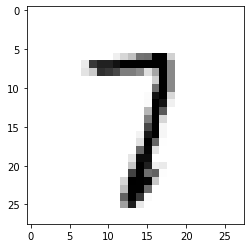

In [13]:
# Evaluating trained model-
plt.imshow(tf.reshape(X_test[234], shape = (28, 28)), cmap = "Greys")
plt.show()

In [14]:
 # Make prediction using trained model-
prediction = model.predict(tf.reshape(X_test[234], shape = (1, 28, 28, 1)))
# number of examples, 28, 28, number of channels

prediction.argmax()

7

In [16]:
# Evalutating trained model-
model.evaluate(X_test, y_test_ohe, verbose=0)

[0.04116819323307245, 0.9881]

In [17]:
# Save FINAL WEIGHTS after training model-
model.save_weights("LeNet-5_MNIST_FINAL_WEIGHTS.h5", overwrite=True)